In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.shape

(10000, 14)

In [18]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
df = df.drop(['RowNumber' , 'CustomerId','Surname' ] , axis = 'columns')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [28]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
df=pd.get_dummies(data=df,drop_first=True)

In [31]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


<Axes: ylabel='Frequency'>

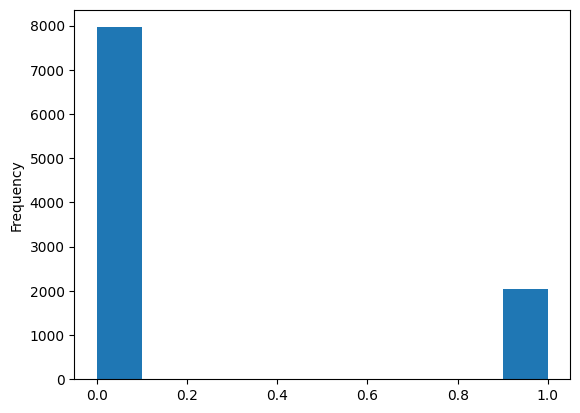

In [32]:
 df.Exited.plot.hist()

In [33]:
(df.Exited==0).sum()

7963

In [34]:
(df.Exited==1).sum()

2037

In [35]:
df1=df.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited column'}>

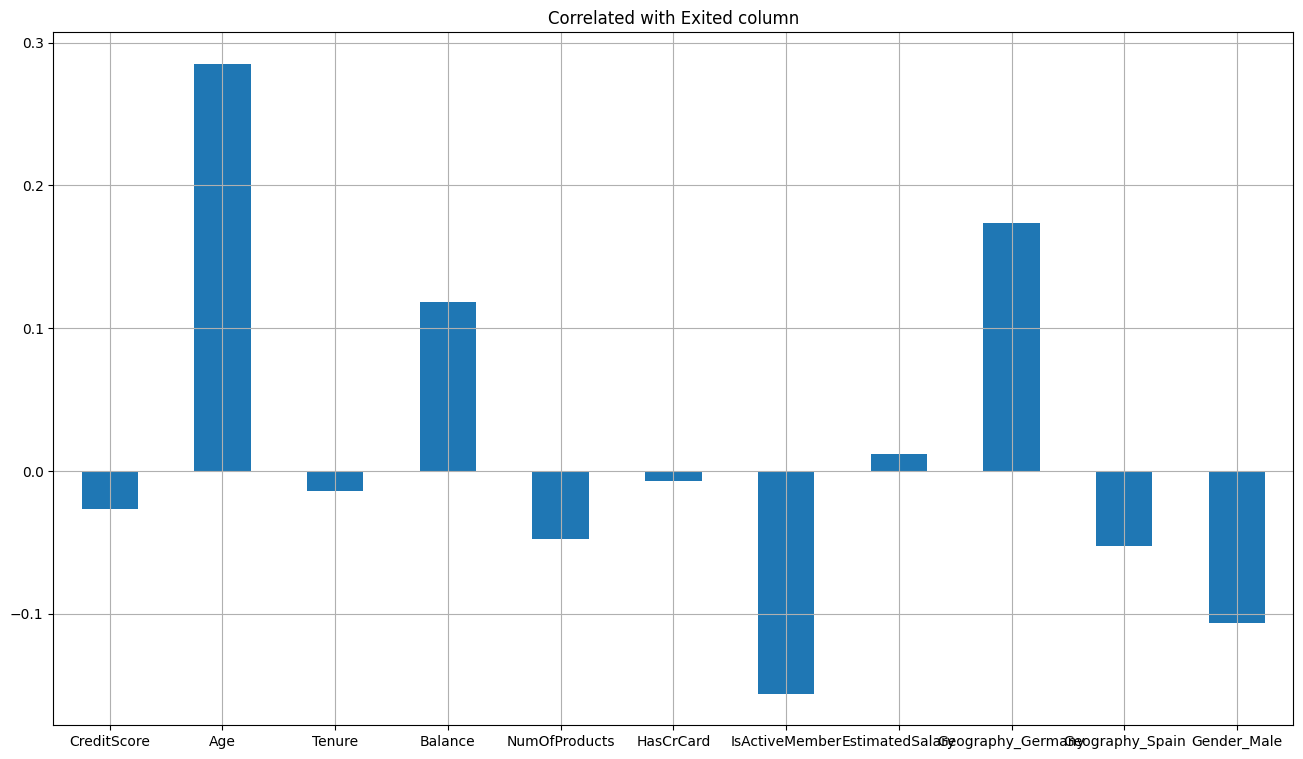

In [37]:
df1.corrwith(df['Exited']).plot.bar(figsize=(16,9),title='Correlated with Exited column',rot=0,grid=True)

In [38]:
corr=df.corr()

<Axes: >

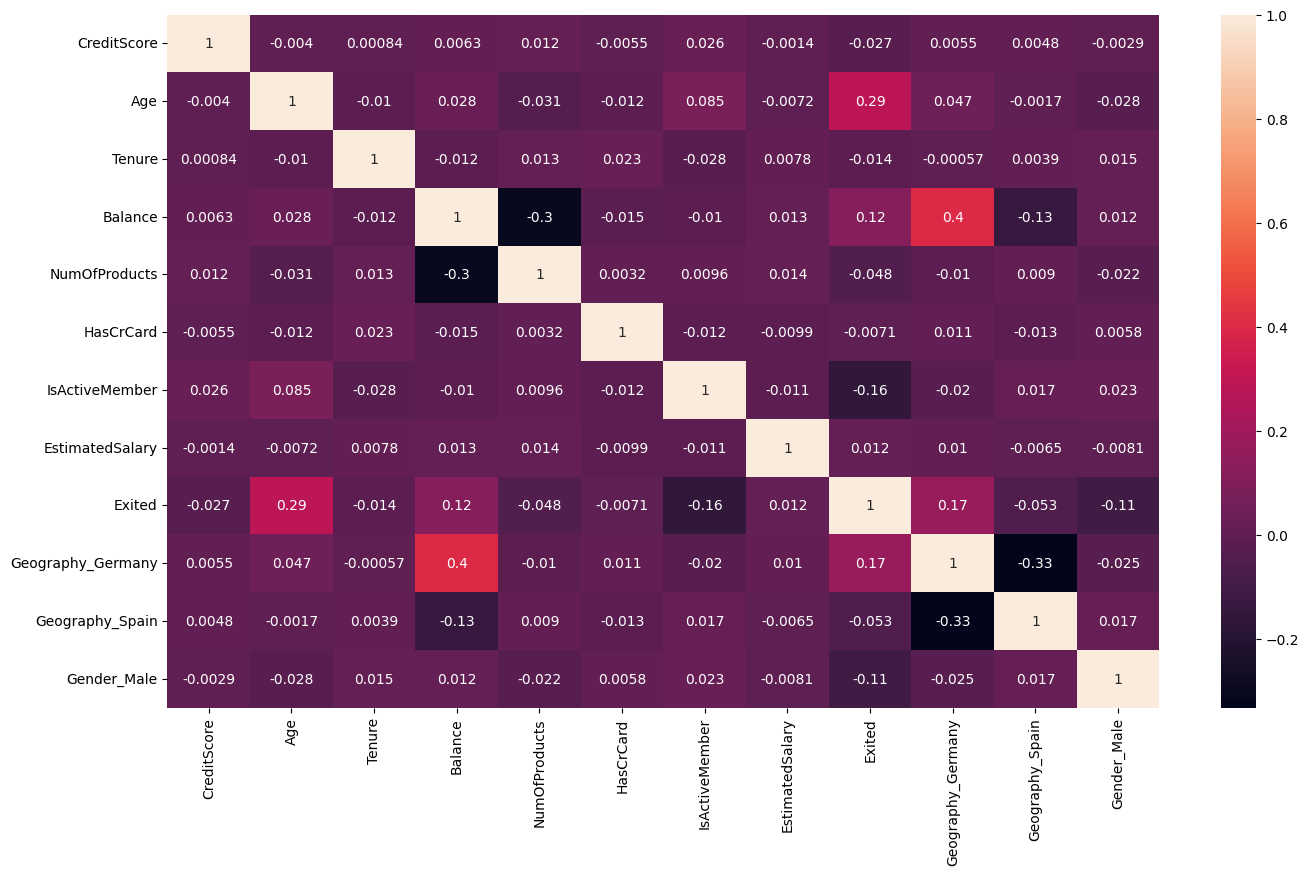

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [46]:
X=df.drop(columns='Exited')
Y=df['Exited']

In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
Xtrain.shape

(8000, 11)

In [49]:
Xtest.shape

(2000, 11)

In [52]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest= scaler.transform(Xtest)

In [53]:
Xtrain

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [96]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(XtrainScaled,Ytrain)



In [97]:
Y_pred=clf.predict(Xtest)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix , f1_score, precision_score, recall_score

In [100]:
acc=accuracy_score(Ytest,Y_pred)
f1=f1_score(Ytest,Y_pred)
prec=precision_score(Ytest,Y_pred)
rec=recall_score(Ytest,Y_pred)

In [101]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','accuracy','f1','precision','recall'])
results

,Model,accuracy,f1,precision,recall
0,Logistic regression,0.7655,0.506835,0.4319,0.613232


In [118]:
print(confusion_matrix(Ytest,Y_pred))

[[1290  317]
 [ 152  241]]


In [113]:

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=5)

model1.fit(XtrainScaled,Ytrain)

KNeighborsClassifier()

In [105]:
print("Training Data" , model1.score(XtrainScaled,Ytrain))
print("Test Data" , model1.score(XtestScaled,Ytest)) 


Training Data 0.86525
Test Data 0.8235


In [114]:
from sklearn.metrics import confusion_matrix

#Confusion matrix for model 1

YtrainPred_1 = model1.predict(XtrainScaled)
YtestPred_1 = model1.predict(XtestScaled)

In [115]:
confusion_matrix(Ytrain , YtrainPred_1)

array([[6150,  206],
       [ 872,  772]], dtype=int64)

In [117]:
confusion_matrix(Ytest , YtestPred_1)

array([[1520,   87],
       [ 266,  127]], dtype=int64)

In [119]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [124]:
single_obs=[[647,40,3,85000.45,2,0,0,92012.45,0,1,1]]
clf.predict(scaler.fit_transform(single_obs))

array([0], dtype=int64)

In [125]:
# customer will be staying at the bank